# KNN (K-Nearest Neighbors)

**KNN:**

Sınıflandırma problemlerini çözmek için kullanılan basit ama etkili bir yöntemdir.

**İçerik:**

* KNN Algoritması
* Uzaklık Kavramı
* Karar Verme Kuralları
* KNN ile Model Oluşturma
* PROJE: Scikit-Learn ile KNN Uygulaması

#### Nearest Neighbor (En Yakın Komşu) Algoritması

K-NN'e geçmeden önce aslında, NN yani Nearest Neighbor (En Yakın Komşu) Algoritmasını anlamamız lazım

NN'de amaç bilinmeyen bir veri için, kendisine en yakın komşuyu bulmaktır.

Bu en yakın verinin sonucu ne ise bilinmeyen için de o sonucu tahmin eder.

<img src='images/nn.jpeg' />

Bu resimde gördüğünüz gibi bilinmeyen noktaya en yakın nokta Kırmızı renkli olduğu için biz de bilinmeyen noktanın rengini Kırmızı olarak kabul ederiz.

#### K-Nearest Neighbor (En Yakın K Komşu) Algoritması

K-Nearest Neighbor (KNN) Algoritması aslında Nearest Neighbor'un (NN) genelleştirilmiş halidir.

Burada artık tek (en yakın olan) komşuya değil de K adet komşuya bakıp karar veririz.

<img src='images/KNN_1.png' />

Bu K adet komşu içinde var olan sınıfların oranlarını alırız ve en yüksek orana sahip olan sınıfı seçeriz.

Örneğin yukarıda:
* K = 3 için seçilecek sınıf Mor  -> 2/3
* K = 6 için seçilecek sınıf Sarı -> 4/6 

## KNN'in Uygulanışı

Süreç:

1. Verinin Hazırlanması
2. Mesafelerin Hesaplanması
3. Komşuların Bulunması
4. Sınıflandırma Yapılması

### Verinin Hazırlanması

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Önce kendimize bir veri seti oluşturalım.

Verimiz iki değişkenli (features: x, y) olacak ve iki sınıflı olacak (labels: A, B).

Bu şekilde iki sınıflı classification problemlerine **binary classification** denir.

In [3]:
def veri_olustur():
    """
    Veriyi oluşturan fonksiyon.
    features: değişkenler, x ve y
    labels: sınıflar (A, B)
    """
    
    features = np.array(
        [[2.88, 3.05], [3.1, 2.45], [3.05, 2.8], [2.9, 2.7], [2.75, 3.4],
         [3.23, 2.9], [3.2, 3.75], [3.5, 2.9], [3.65, 3.6],[3.35, 3.3]])
    
    labels = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
    
    return features, labels
    

In [4]:
# fonksiyonu çağırıp veriyi oluşturalım

features, labels = veri_olustur()

In [7]:
print('features\n', features)

features
 [[2.88 3.05]
 [3.1  2.45]
 [3.05 2.8 ]
 [2.9  2.7 ]
 [2.75 3.4 ]
 [3.23 2.9 ]
 [3.2  3.75]
 [3.5  2.9 ]
 [3.65 3.6 ]
 [3.35 3.3 ]]


In [8]:
print('labels\n', labels)

labels
 ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


In [9]:
features[0]

array([2.88, 3.05])

In [12]:
x_df = pd.DataFrame(features)

In [13]:
x_df

,0,1
0,2.88,3.05
1,3.10,2.45
2,3.05,2.80
3,2.90,2.70
4,2.75,3.40
5,3.23,2.90
6,3.20,3.75
7,3.50,2.90
8,3.65,3.60
9,3.35,3.30


In [16]:
for point in x_df[0]:
    print(point)

2.88
3.1
3.05
2.9
2.75
3.23
3.2
3.5
3.65
3.35


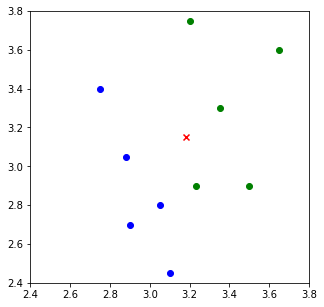

In [45]:
# Class'ları renkli olarak grafikte görelim

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))

# mecvut data
# A -> mavi (blue)
# B -> yeşil (green)
plt.scatter(x_df.iloc[:5,0], x_df.iloc[:5,1], c="b")
plt.scatter(x_df.iloc[5:,0], x_df.iloc[5:,1], c="g")

# tahmin etmek istediğimiz nokta: [3.18，3.15]
plt.scatter([3.18],[3.15],c="r",marker="x")

plt.show()

### Mesafelerin Hesaplanması

Matematikte iki nesne arasındaki benzerlik hesaplanırken mesafelerden faydalanılır. 

Eğer mesafe az ise bu iki nesne benzer kabul edilir.

Eğer mesafe fazla ise benzerliğinin düşük olduğu kabul edilir.

**Soru:**

Peki **mesafe** nasıl hesaplanır?

**Cevap:**

Mesafe (Distance) hesaplamak için kullanılan çok farklı yöntemler vardır.

Biz, ML için en yaygın kullanılan iki tanesini inceleyeceğiz:
* Manhattan Distance
* Euclidean Distance

<img src='images/distance.jpeg' />

**Manhattan Distance:**

İki nokta arasındaki dik mesafeleri (90 derecelik dönüş) hesaplar.

$$d_{man}=\sum_{i=1}^{N}\left | X_{i}-Y_{i} \right |$$

In [29]:
def manhattan(x, y):
    """ Manhattan Distance """
    d = np.sum(np.abs(x - y))
    return d


In [37]:
x = np.array([3, 5])
print("x:", x)

y = np.array([6, 9])
print("y:", y)

d_man = manhattan(x, y)
print(d_man)

x: [3 5]
y: [6 9]
7


**Euclidean Distance:**

İki nokta arasındaki en kısa mesafeyi (Öklid uzaklığı) hesaplar.

$$d_{euc}= \sqrt{\sum_{i=1}^{N}(X_{i}-Y_{i})^{2}}$$

In [33]:
def euclidean(x, y):
    """ Euclidean distanc """
    d = np.sqrt(np.sum(np.square(x - y)))
    return d


In [38]:
x = np.array([3, 5])
print("x:", x)

y = np.array([6, 9])
print("y:", y)

d_euc = euclidean(x, y)
print(d_euc)

x: [3 5]
y: [6 9]
5.0


### Karar Verme Kuralları

KNN'de mesafleri hesapladıktan sonra nasıl bir yöntem ile karar verileceğini belirlememiz lazım:

Diyelim ki, tahmin noktamız için K adet en yakın komşuyu bulduk. 

Şimdi bu tahmin noktasının hangi sınıfa ait olduğuna nasıl karar vereceğiz?

* Çoğunluk Yöntemi (sayıca en fazla olan sınıf kazanır) - GENELDE KULLANILAN
* Ağırlıklandırma Yöntemi (sınıflara ağırlık verilerek oranlar hesaplanır)

In [39]:
# Adetlere göre çoğunluk sıralaması yapan bir fonksiyon yazalım

import operator
# https://docs.python.org/3/library/operator.html

def cogunluk_yontemi(class_count):
    sorted_class_count = sorted(class_count.items(), 
                                key=operator.itemgetter(1), 
                                reverse=True)
    return sorted_class_count


In [43]:
# Bir dictionary tanımlayalım
arr = {'A': 3, 'B': 2, "C": 6, "D": 5}

# sınıfların sayısını büyükten küçüğe yazalım
cogunluk_yontemi(arr)

[('C', 6), ('D', 5), ('A', 3), ('B', 2)]

### KNN'in Uygulanışı

KNN için gerekli adımları öğrendiğimize göre, artık bunları uygulayabiliriz:

Burada kararlarımız:
* Mesafe: Euclidean Distance
* Karar Verme Kuralı: Çoğunluk Yöntemi

In [49]:
def knn(test_data, train_data, labels, k):
    """KNN Uygulama Fonksiyonu"""
    
    # Mesafeler için boş bir list oluşturalım
    distances = np.array([]) 
    
    # Euclidean Distance ile mesafeleri hesapla
    for each_data in train_data:  
        d = euclidean(test_data, each_data)
        distances = np.append(distances, d)
        
    # Mesafeleri sırala ve sıralı indexleri al
    sorted_distance_index = distances.argsort()  
    sorted_distance = np.sort(distances)
    
    # Yarıçapı hesapla (k-1 indexli eleman son elemandır)
    r = (sorted_distance[k]+sorted_distance[k-1])/2 
    
    class_count = {}
    
    # Çoğunluk Yöntemi
    for i in range(k):  
        vote_label = labels[sorted_distance_index[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1
        
    # sınıf değeri yani seçilen class (label)
    final_label = cogunluk_yontemi(class_count)
    
    return final_label, r

### Sınıfandırma Tahmini

KNN için uygulama fonksiyonumuzu yazdığımıza göre, şimdi tahmin etmeye çalıştığımız `[3.18，3.15]` noktasındaki sınıfı tahminleyebiliriz. 

In [50]:
# tahmin noktamız bizim test datamız olacak
test_data=np.array([3.18,3.15])

# knn() fonksiyonunu çağıralım k = 5 için
final_label, r = knn(test_data, features, labels, 5)

In [51]:
print(final_label)

[('B', 3), ('A', 2)]


In [52]:
print(r)

0.4517360073513873


### Sonuç Görselleştirme

In [59]:
# K = 5 için elde ettiğimi yarıçap (r) için bir çember çizelim

# Polar coordinates：x=r*cosθ，y=r*sinθ.
def cember(r, a, b):  
    theta = np.arange(0, 2*np.pi, 0.01)
    x = a+r * np.cos(theta)
    y = b+r * np.sin(theta)
    return x, y


In [60]:
# cember() fonksiyonunu çağırıp, 
# çemberin her bir noktası için x ve y değerlerini alalım

k_circle_x, k_circle_y = cember(r, 3.18, 3.15)

In [61]:
k_circle_x

array([3.63173601, 3.63171342, 3.63164566, 3.63153274, 3.63137467,
       3.63117145, 3.63092313, 3.63062971, 3.63029122, 3.62990771,
       3.62947921, 3.62900576, 3.62848741, 3.62792421, 3.62731622,
       3.6266635 , 3.62596611, 3.62522413, 3.62443762, 3.62360667,
       3.62273136, 3.62181178, 3.62084802, 3.61984017, 3.61878834,
       3.61769263, 3.61655315, 3.61537002, 3.61414335, 3.61287326,
       3.61155989, 3.61020336, 3.60880382, 3.60736139, 3.60587623,
       3.60434848, 3.60277829, 3.60116583, 3.59951125, 3.59781473,
       3.59607642, 3.5942965 , 3.59247515, 3.59061256, 3.5887089 ,
       3.58676438, 3.58477918, 3.5827535 , 3.58068754, 3.57858152,
       3.57643564, 3.57425012, 3.57202517, 3.56976102, 3.5674579 ,
       3.56511602, 3.56273564, 3.56031699, 3.5578603 , 3.55536582,
       3.55283382, 3.55026452, 3.5476582 , 3.54501512, 3.54233554,
       3.53961972, 3.53686794, 3.53408047, 3.5312576 , 3.5283996 ,
       3.52550676, 3.52257937, 3.51961772, 3.51662211, 3.51359

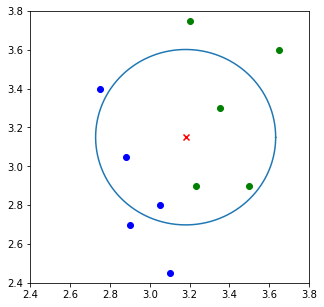

In [62]:
# Class'ları renkli olarak grafikte görelim
plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))

# mecvut data
plt.scatter(x_df.iloc[:5,0], x_df.iloc[:5,1], c="b")
plt.scatter(x_df.iloc[5:,0], x_df.iloc[5:,1], c="g")

# tahmin etmek istediğimiz nokta: [3.18，3.15]
plt.scatter([3.18],[3.15],c="r",marker="x")

# çemberi çizelim
plt.plot(k_circle_x, k_circle_y)

plt.show()

Gördüğünüz gibi K = 5 için en yakın 5 nokta çemberin içinde:
* 3 tanesi yeşil (B sınıfı)
* 2 tanesi mavi (A sınıfı)

Dolayısı ile Çoğunluk Yöntemine göre `x` noktası `Yeşil` olarak tahmin edelir.

**Son Söz:**

Gördüğünüz gibi seçmiş olduğunuz K değerinin çok tahmin sonucunda çok büyük bir etkisi var.